# Classification Algorithems :

* Dataset : Titanic - Machine Learning from Disaster (kaggle compitition)

###  Treebase :

In [3]:
######################
### Importing data ###
######################

import pandas as pd
df = pd.read_csv('titanic.csv',index_col='PassengerId')
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Data Dictionary :

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | sex | - |
| Age | Age in years | - |
| sibsp | # of siblings / spouses aboard the Titanic | - |
| parch | # of parents / children aboard the Titanic | - |
| ticket | Ticket number | - |
| fare | Passenger fare | - |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


### Data Description :

1. pclass: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower


2. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


3. sibsp: The dataset defines family relations in this way...
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiancés were ignored)


4. parch: The dataset defines family relations in this way...
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.


### Handling Missing Values :

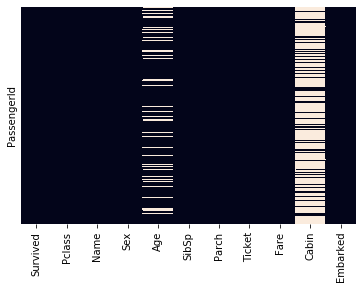

In [4]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

* Here We can see that Cabin has more then 50% missing value. So we will remove that column.
* And Age has few misiing data so, We fill that with median od all values of that column.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


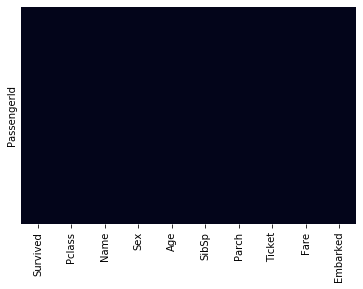

In [5]:
df.drop('Cabin',axis=1,inplace=True)
df['Age'].fillna( df['Age'].mean(),inplace=True)
df['Embarked'].fillna('S',inplace=True)
display(df.head(3))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

### Exploratory Data Analysis :

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments

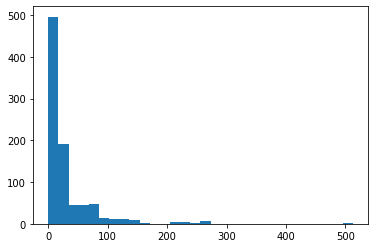

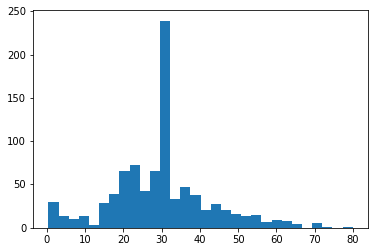

______________________________________________________________________
male      577
female    314
Name: Sex, dtype: int64
______________________________________________________________________
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
______________________________________________________________________
3    491
1    216
2    184
Name: Pclass, dtype: int64
______________________________________________________________________
0    549
1    342
Name: Survived, dtype: int64
______________________________________________________________________
S    646
C    168
Q     77
Name: Embarked, dtype: int64
______________________________________________________________________
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
______________________________________________________________________


In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(df['Fare'],bins=30)
plt.show()
plt.hist(df['Age'],bins=30)
plt.show()

#sns.countplot(x = 'Fare' , data = df)
#plt.show()
#sns.countplot(x = 'Age' , data = df)
#plt.show()
print('______________________________________________________________________')
for i in ['Sex','SibSp','Pclass','Survived','Embarked','Parch']:
    print(df[i].value_counts())
    print('______________________________________________________________________')

In [7]:
### co-relation metrix
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


### Encoding Features:

In [8]:
df['Sex']=df['Sex'].map({'male':1,'female':0})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

df['fz'] = df.SibSp + df.Parch + 1  

from scipy.stats import zscore
df['Age'] = zscore(df['Age'])
df['Fare'] = zscore(df['Fare'])

df.drop(['Name','Ticket'],axis=1,inplace=True)
display(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fz
PassengerId,,,,,,,,,
1,0,3,1,-0.592481,1,0,-0.502445,0,2
2,1,1,0,0.638789,1,0,0.786845,1,2
3,1,3,0,-0.284663,0,0,-0.488854,0,1
4,1,1,0,0.407926,1,0,0.420730,0,2
5,0,3,1,0.407926,0,0,-0.486337,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,1,-0.207709,0,0,-0.386671,0,1
888,1,1,0,-0.823344,0,0,-0.044381,0,1
889,0,3,0,0.000000,1,2,-0.176263,0,4


In [9]:
from sklearn.model_selection import train_test_split
x = df[df.columns.drop('Survived')].values
print(x.shape)
y = df['Survived'].values
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30,stratify=y,random_state=1)

(891, 8)


### Apply  Cecision Tree Algorithm:

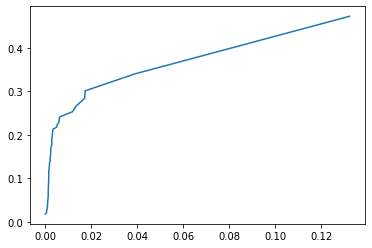

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.plot(ccp_alphas,impurities)

In [11]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score

param_grid = {'ccp_alpha': np.linspace(0., 0.14, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param_grid, cv=10)
grid.fit(x_train, y_train)
f = grid.best_estimator_
f.fit(x_train,y_train)
print(f'test score : {f.score(x_test,y_test)}')
y_pred = f.predict(x_test)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print(f'roc_auc_score : {roc_auc_score(y_pred,y_test)}')

test score : 0.8283582089552238
Precision: 0.835
Recall: 0.689
F1: 0.755
roc_auc_score : 0.8302153648344585


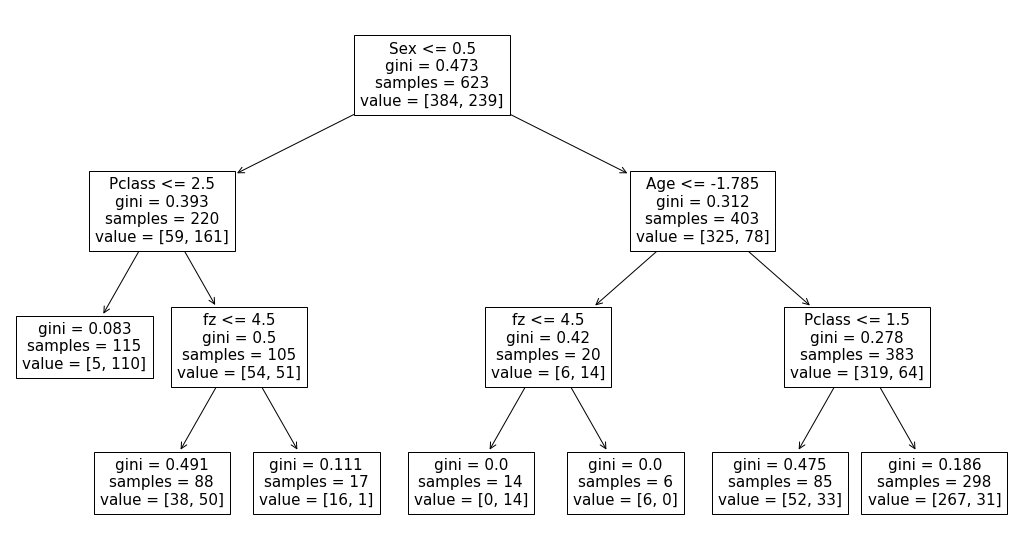

In [12]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(18, 10))
tree_dot = plot_tree(f, feature_names=df.columns.drop('Survived'),fontsize=None)


<BarContainer object of 8 artists>

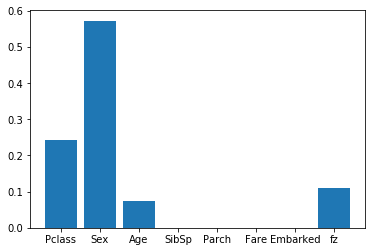

In [13]:
### feature importance ###
im = f.feature_importances_
plt.bar(x = df.columns.drop('Survived'),height=im)

###  Non Treebase:


In [14]:
# Logistic Regression on Diabetes Dataset
from random import seed
from random import randrange
from csv import reader
from math import exp
import pandas as pd

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + exp(-yhat))

# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			yhat = predict(row, coef)
			error = row[-1] - yhat
			coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
	return coef

# Linear Regression Algorithm With Stochastic Gradient Descent
def logistic_regression(train, test, l_rate, n_epoch):
	predictions = list()
	coef = coefficients_sgd(train, l_rate, n_epoch)
	for row in test:
		yhat = predict(row, coef)
		yhat = round(yhat)
		predictions.append(yhat)
	return(predictions)


def clean(r):
    if r[2] == 'male':
        r[2] = '1'
    else:
        r[2] = '0'
    if r[7] == 'S' or r[7]=='' or r[7]=='-':
        r[7] = '0'
    elif r[7] == 'Q':
        r[7] = '1'
    else:
        r[7] = '2'
    if r[3] == '' or r[3]=='-':
        r[3] = '29'

    return r
    
# Test the logistic regression algorithm on the diabetes dataset
seed(1)
# load and prepare data
filename = 'titanic.csv'
dataset = load_csv(filename)

[r.pop(0) for r in dataset]
[r.pop(2) for r in dataset]
[r.pop(6) for r in dataset]
[r.pop(7) for r in dataset]

[clean(r) for r in dataset[1:]]

display(dataset[0:3])
dataset.pop(0)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
    
# normalize
minmax = dataset_minmax(dataset)
print(minmax)
normalize_dataset(dataset, minmax)


[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
 ['0', '3', '1', '22', '1', '0', '7.25', '0'],
 ['1', '1', '0', '38', '1', '0', '71.2833', '2']]

[[0.0, 1.0], [1.0, 3.0], [0.0, 1.0], [0.42, 80.0], [0.0, 8.0], [0.0, 6.0], [0.0, 512.3292], [0.0, 2.0]]


In [16]:
# evaluate algorithm
n_folds = [5,10,15,20,25,30,50]
l_rate = [0.1,0.1,0.3,0.03]
n_epoch = [100,150,50]

scorelist_dict = []

for fold in n_folds:
    scores = evaluate_algorithm(dataset, logistic_regression, fold, 0.1, 100)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
    scorelist_dict.append({'folds': fold,'lr':0.1,'epoch':100,'mean_score':(sum(scores)/float(len(scores)))})
    
best_dict = scorelist_dict[0]
for i in scorelist_dict:
    if i['mean_score'] > best_dict['mean_score']:
        best_dict = i

print(best_dict)

for lr in l_rate:
    scores = evaluate_algorithm(dataset, logistic_regression, best_dict['folds'], lr, 100)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
    scorelist_dict.append({'folds': best_dict['folds'],'lr':lr,'epoch':100,'mean_score':(sum(scores)/float(len(scores)))})
    
for i in scorelist_dict:
    if i['mean_score'] > best_dict['mean_score']:
        best_dict = i

print(best_dict)
        
for epoch in n_epoch:
    scores = evaluate_algorithm(dataset, logistic_regression, best_dict['folds'], best_dict['lr'], epoch)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
    scorelist_dict.append({'folds': best_dict['folds'],'lr':best_dict['folds'],'epoch':epoch,'mean_score':(sum(scores)/float(len(scores)))})
    
for i in scorelist_dict:
    if i['mean_score'] > best_dict['mean_score']:
        best_dict = i

print(best_dict)            

Mean Accuracy: 72.809%
Mean Accuracy: 73.034%
Mean Accuracy: 72.881%
Mean Accuracy: 72.841%
Mean Accuracy: 73.143%
Mean Accuracy: 73.218%
Mean Accuracy: 72.706%
{'folds': 30, 'lr': 0.1, 'epoch': 100, 'mean_score': 73.21839080459773}
Mean Accuracy: 72.529%
Mean Accuracy: 72.759%
Mean Accuracy: 72.874%
Mean Accuracy: 72.644%
{'folds': 30, 'lr': 0.1, 'epoch': 100, 'mean_score': 73.21839080459773}
Mean Accuracy: 73.218%
Mean Accuracy: 73.103%
Mean Accuracy: 72.989%
{'folds': 30, 'lr': 0.1, 'epoch': 100, 'mean_score': 73.21839080459773}
